In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


C:\Users\CSS_0\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [15]:
#TYPES
CARDBOARD = 0
GLASS = 1
METAL = 2
PAPER = 3
PLASTIC = 4
TRASH = 5
TrashType = [CARDBOARD,GLASS,METAL,PAPER,PLASTIC,TRASH]

#NUMBER OF DATASET
NUM_CARDBOARD = 403
NUM_GLASS = 501
NUM_METAL = 410
NUM_PAPER = 594
NUM_PLASTIC = 482
NUM_TRASH = 137
NUM_TOTAL = NUM_CARDBOARD + NUM_GLASS + NUM_METAL + NUM_PAPER + NUM_PLASTIC + NUM_TRASH

In [3]:
WIDTH = 512
HEIGHT = 384
DEPTH = 3 # since rgb

In [21]:
def jpeg_decode(x):
    return tf.io.decode_jpeg(tf.read_file(x))

def parse_input():
    # grab all images as dataset
    cardboard_dataset = tf.data.Dataset.list_files("dataset-resized/cardboard/*.jpg")
    cardboard_image = cardboard_dataset.map(jpeg_decode)
    glass_dataset = tf.data.Dataset.list_files("dataset-resized/glass/*.jpg")
    glass_image = glass_dataset.map(jpeg_decode)
    metal_dataset = tf.data.Dataset.list_files("dataset-resized/metal/*.jpg")
    metal_image = metal_dataset.map(jpeg_decode)
    paper_dataset = tf.data.Dataset.list_files("dataset-resized/paper/*.jpg")
    paper_image = paper_dataset.map(jpeg_decode)
    plastic_dataset = tf.data.Dataset.list_files("dataset-resized/plastic/*.jpg")
    plastic_image = plastic_dataset.map(jpeg_decode)
    trash_dataset = tf.data.Dataset.list_files("dataset-resized/trash/*.jpg")
    trash_image = trash_dataset.map(jpeg_decode)
    
    # label for each image
    cb_label = tf.data.Dataset.from_tensor_slices(tf.fill([NUM_CARDBOARD],CARDBOARD))
    gl_label = tf.data.Dataset.from_tensor_slices(tf.fill([NUM_GLASS],GLASS))
    mt_label = tf.data.Dataset.from_tensor_slices(tf.fill([NUM_METAL],METAL))
    pp_label = tf.data.Dataset.from_tensor_slices(tf.fill([NUM_PAPER],PAPER))
    pl_label = tf.data.Dataset.from_tensor_slices(tf.fill([NUM_PLASTIC],PLASTIC))
    tr_label = tf.data.Dataset.from_tensor_slices(tf.fill([NUM_TRASH],TRASH))
    
    # combine images and their labels
    cardboard_ds = tf.data.Dataset.zip((cardboard_image,cb_label))
    glass_ds = tf.data.Dataset.zip((glass_image,gl_label))
    metal_ds = tf.data.Dataset.zip((metal_image,mt_label))
    paper_ds = tf.data.Dataset.zip((paper_image,pp_label))
    plastic_ds = tf.data.Dataset.zip((plastic_image,pl_label))
    trash_ds = tf.data.Dataset.zip((trash_image,tr_label))
    
    # concatnate different datasets
    temp1_ds = cardboard_ds.concatenate(glass_ds)
    temp2_ds = metal_ds.concatenate(paper_ds)
    temp3_ds = plastic_ds.concatenate(trash_ds)
    temp4_ds = temp1_ds.concatenate(temp2_ds)
    full_ds = temp4_ds.concatenate(temp3_ds)
    #shuffle the dataset
    full_ds_shuffled = full_ds.shuffle(10000)
    
    shuffled_data = full_ds_shuffled.map(lambda a, b:a)
    shuffled_label = full_ds_shuffled.map(lambda a, b:b)
    
    train_size = int(0.7 * NUM_TOTAL)
    val_size = int(0.15 * NUM_TOTAL)
    test_size = int(0.15 * NUM_TOTAL)
    
    train_data = shuffled_data.take(train_size)
    train_label = shuffled_label.take(train_size)
    temp_data = shuffled_data.skip(train_size)
    temp_label = shuffled_label.skip(train_size)
    validate_data = temp_data.take(val_size)
    validate_label = temp_label.take(val_size)
    test_data = temp_data.skip(val_size)
    test_label = temp_label.skip(val_size)
    
    return train_data, train_label, validate_data, validate_label, test_data, test_label
    
    
#     tensor = shuffled_data.make_one_shot_iterator().get_next()
    
#     count = 0
#     with tf.Session() as sess:
#         while count != 30:
#             print(sess.run(tensor))
#             count+=1

    
    
parse_input()


(<DatasetV1Adapter shapes: (?, ?, ?), types: tf.uint8>,
 <DatasetV1Adapter shapes: (), types: tf.int32>,
 <DatasetV1Adapter shapes: (?, ?, ?), types: tf.uint8>,
 <DatasetV1Adapter shapes: (), types: tf.int32>,
 <DatasetV1Adapter shapes: (?, ?, ?), types: tf.uint8>,
 <DatasetV1Adapter shapes: (), types: tf.int32>)

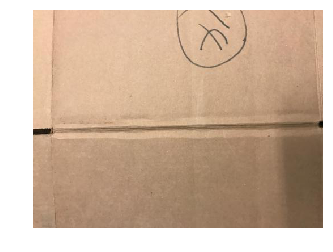

(384, 512, 3)


In [45]:
image = plt.imread("dataset-resized/cardboard/cardboard1.jpg")
plt.axis("off")
plt.imshow(image)
plt.show()
print(image.shape)

In [92]:
filename_dataset = tf.data.Dataset.list_files("dataset-resized/cardboard/*.jpg")

image_dataset = filename_dataset.map(jpeg_decode)


#print(image_dataset[0])
iterator = image_dataset.make_one_shot_iterator()
next_image = iterator.get_next()


# # count = 0
# # # Start a new session to show example output.
# # cardboard = np.zeros(403)
# with tf.Session() as sess:
#     #NI = next_image.eval()
#      try:
#         while True:
# #             # Get an image tensor and print its value.
#               image_tensor = np.array(sess.run([next_image]))[0]
# #             #       if (count == 0):
# #             #           plt.imshow(image_tensor[0])
# #             #           plt.show()
# #             #             #plt.imshow(image_tensor)
# #             #           #print(image_tensor.reshape(-1,512*384))
# #             #cardboard[count] = image_tensor[0].reshape(-1,384*512*3)
# #             #print(count)
# #             #print(image_tensor[0].shape())
# #             #count+=1
# #             #print(count)
# #             #cardboard = np.append(cardboard,image_tensor)



#      except tf.errors.OutOfRangeError:
# #         # We have reached the end of `image_dataset`.
#          pass
# # print(cardboard)

<dtype: 'uint8'>
(?, ?, ?)


In [90]:
np.shape(image_tensor)

(384, 512, 3)

In [133]:
with tf.Session() as sess:
    first = tf.data.Dataset.from_tensor_slices(tf.range(5))
    second = tf.data.Dataset.from_tensor_slices(tf.range(10,15,1))

In [113]:
i1 = first.make_one_shot_iterator()
n1 = i1.get_next()
i2 = second.make_one_shot_iterator()
n2 = i2.get_next()

In [134]:
with tf.Session() as sess:
#     try:
#         while True:
#             print(sess.run([n1]))
#             print(sess.run([n2]))
#     except tf.errors.OutOfRangeError:
# # #         # We have reached the end of `image_dataset`.
#         pass
    thrid = tf.data.Dataset.zip((first,second))

In [141]:

tensor = full_ds.make_one_shot_iterator().get_next()
with tf.Session() as sess:
    try:
        while True:
            print(sess.run(tensor))
    except tf.errors.OutOfRangeError:
        pass

NameError: name 'full_ds' is not defined

In [9]:
with tf.Session() as sess:
    print(tf.fill([NUM_CARDBOARD],1).eval())

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
tensor = forth.make_one_shot_iterator().get_next()
with tf.Session() as sess:
    try:
        while True:
            print(sess.run(tensor))
    except tf.errors.OutOfRangeError:
        pass